In [42]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

In [6]:
os.getcwd()

'/home/daniel/python_projects/Strom/scripts'

In [11]:
# import csv file as a dataframe
df = pd.read_csv('../data/Spain.csv')
df

,Country,ISO3 Code,Datetime (UTC),Datetime (Local),Price (EUR/MWhe)
0,Spain,ESP,2015-01-01 00:00:00,2015-01-01 01:00:00,48.10
1,Spain,ESP,2015-01-01 01:00:00,2015-01-01 02:00:00,47.33
2,Spain,ESP,2015-01-01 02:00:00,2015-01-01 03:00:00,42.27
3,Spain,ESP,2015-01-01 03:00:00,2015-01-01 04:00:00,38.41
4,Spain,ESP,2015-01-01 04:00:00,2015-01-01 05:00:00,35.72
...,...,...,...,...,...
87855,Spain,ESP,2025-01-08 17:00:00,2025-01-08 18:00:00,122.00
87856,Spain,ESP,2025-01-08 18:00:00,2025-01-08 19:00:00,131.00
87857,Spain,ESP,2025-01-08 19:00:00,2025-01-08 20:00:00,124.81
87858,Spain,ESP,2025-01-08 20:00:00,2025-01-08 21:00:00,112.66


/tmp/ipykernel_37898/1979841826.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Datetime (Local)'] = pd.to_datetime(df['Datetime (Local)'])


<Axes: xlabel='Datetime (Local)'>

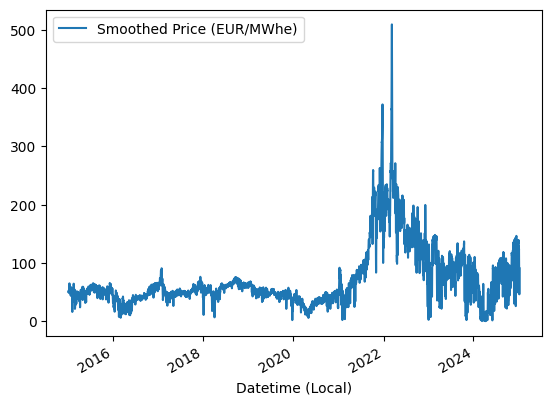

In [26]:
#restrict the data to the dateime (local) and the Price columns
df = df[['Datetime (Local)', 'Price (EUR/MWhe)']]

# change the date format
df['Datetime (Local)'] = pd.to_datetime(df['Datetime (Local)'])
# make a smoothed price column by taking the rolling mean of the price column
df['Smoothed Price (EUR/MWhe)'] = df['Price (EUR/MWhe)'].rolling(window=48).mean()

df.plot(x='Datetime (Local)', y='Smoothed Price (EUR/MWhe)')


<Axes: xlabel='Datetime (Local)'>

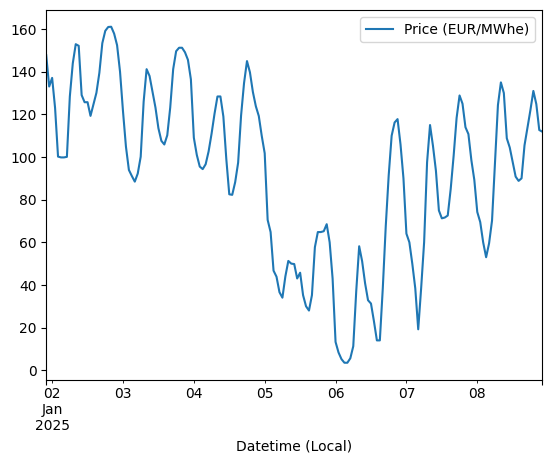

In [32]:
# Get the last date in the DataFrame
last_date = df['Datetime (Local)'].max()

# Calculate the date one week before the last date
one_week_ago = last_date - pd.DateOffset(weeks=1)

# Filter the DataFrame to include only the last week of data
last_week_df = df[df['Datetime (Local)'] >= one_week_ago]

# plot the last week of data
last_week_df.plot(x='Datetime (Local)', y='Price (EUR/MWhe)')

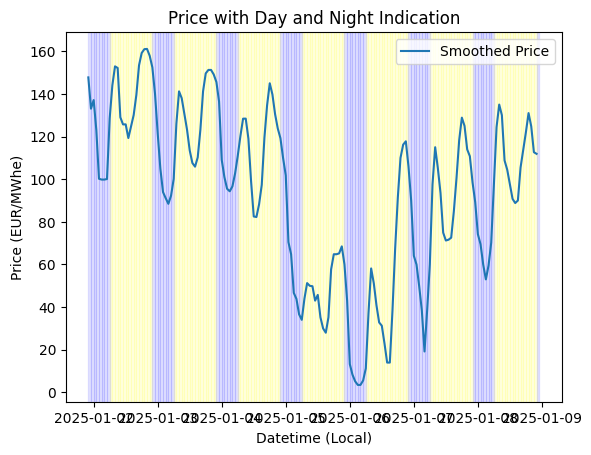

In [40]:

# Plotting
fig, ax = plt.subplots()

# Plot the smoothed price
ax.plot(last_week_df['Datetime (Local)'], last_week_df['Price (EUR/MWhe)'], label='Smoothed Price')

# Add background color gradient for day and night
for _, row in last_week_df.iterrows():
    if row['Datetime (Local)'].hour >= 6 and row['Datetime (Local)'].hour < 22:
        ax.axvspan(row['Datetime (Local)'], row['Datetime (Local)'] + pd.Timedelta(hours=1), color='yellow', alpha=0.1)
    else:

        ax.axvspan(row['Datetime (Local)'], row['Datetime (Local)'] + pd.Timedelta(hours=1), color='blue', alpha=0.1)

# Formatting the x-axis
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.xlabel('Datetime (Local)')
plt.ylabel('Price (EUR/MWhe)')
plt.title('Price with Day and Night Indication')
plt.legend()
plt.show()

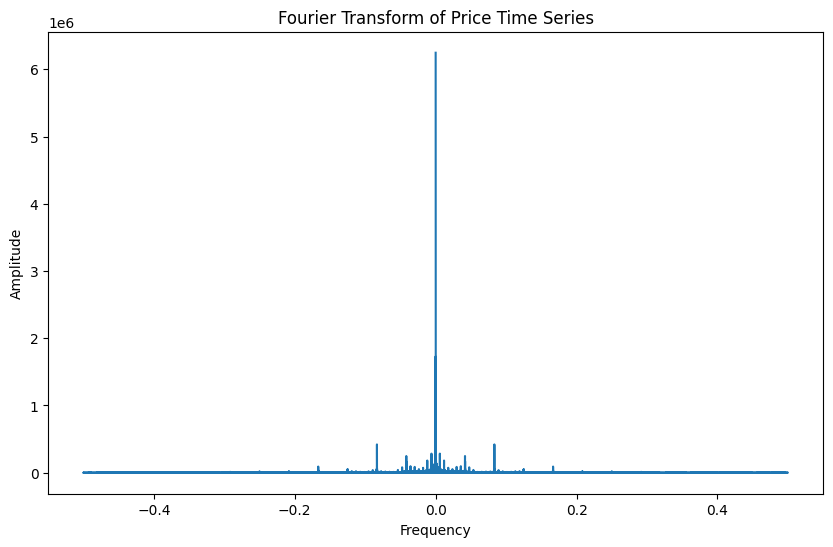

In [44]:
# Filter the DataFrame to include only the last week of data
last_week_df = df[df['Datetime (Local)'] >= one_week_ago].copy()

# Calculate the Fourier Transform
price_data = df['Price (EUR/MWhe)'].values
fft_result = np.fft.fft(price_data)
fft_freq = np.fft.fftfreq(len(price_data))

# Plotting the Fourier Transform
plt.figure(figsize=(10, 6))
plt.plot(fft_freq, np.abs(fft_result))
plt.yscale('log')
plt.xlabel('Frequency')
plt.ylabel('Amplitude (log scale)')
plt.title('Fourier Transform of Price Time Series')
plt.show()